In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from joblib import load
from datetime import datetime
import seaborn as sns
import pickle

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues, save_path="/content/drive/MyDrive/FallDetectionAI/SavedPlot"):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    if save_path:
        date_str = datetime.now().strftime("%Y-%m-%d")  # Get current date
        filename = f"{date_str}_{title}.png" if title else f"{date_str}_confusion_matrix.png"
        plt.savefig(f"{save_path}/{filename}")
        print(f"Confusion matrix saved to {save_path}/{filename}")

    plt.show()

In [20]:
df = pd.read_csv('/content/drive/MyDrive/FallDetectionAI/TestDataset/dataset_extract.csv')


In [21]:
df.head()

,Unnamed: 0,max_acc_re_raw,std_acc_re_raw,var_acc_re_raw,iqr_acc_re_raw,mad_acc_re_raw,max_acc_re_jerk,min_acc_re_jerk,range_acc_re_jerk,std_acc_re_jerk,...,var_gyro_re_raw,iqr_gyro_re_raw,mad_gyro_re_raw,max_gyro_re_jerk,min_gyro_re_jerk,range_gyro_re_jerk,std_gyro_re_jerk,var_gyro_re_jerk,mad_gyro_re_jerk,fall_adl_bin
0,0,115.024493,24.741781,612.155707,19.252090,5.153206,82.560319,-61.042769,143.603087,17.059250,...,4.636462,3.991397,2.015713,3.532227,-2.659478,6.191706,0.767666,0.589311,0.246427,1.0
1,1,117.711772,16.768012,281.166228,4.236920,1.884415,89.751237,-58.436630,148.187867,14.200206,...,3.322654,3.244466,1.231510,1.385561,-2.494360,3.879921,0.540023,0.291625,0.188081,1.0
2,2,115.109201,14.239560,202.765078,8.481138,4.228995,58.012593,-62.690430,120.703023,10.882919,...,3.546517,2.574878,1.164197,2.636321,-3.712825,6.349147,0.815085,0.664364,0.247422,1.0
3,3,126.852948,14.902969,222.098498,6.632980,3.276836,73.356606,-110.498406,183.855012,14.259771,...,1.972748,1.722881,0.686246,3.264160,-3.181417,6.445577,0.657970,0.432925,0.201116,1.0
4,4,135.883543,22.889379,523.923658,11.711906,5.950308,118.347070,-54.881210,173.228280,18.794910,...,4.029638,3.225962,0.829688,2.178181,-2.062997,4.241178,0.674245,0.454606,0.211749,1.0


<Axes: xlabel='fall_adl_bin', ylabel='count'>

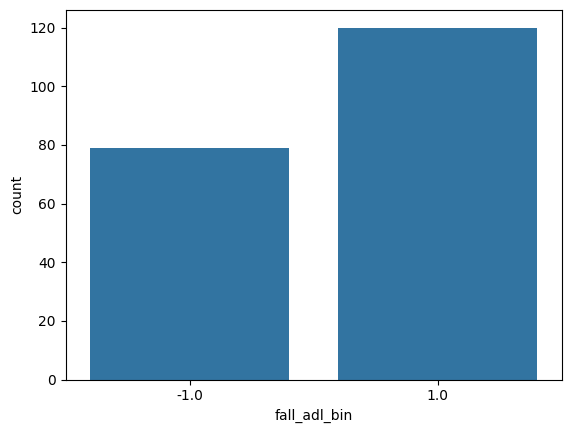

In [22]:
sns.countplot(x="fall_adl_bin", data=df)

In [ ]:
X_test = df.iloc[:, 1:-1]
y_test = df.iloc[:, -1]

In [23]:
# path = '/content/drive/MyDrive/FallDetectionAI/new_model.pkl'
path = '/content/drive/MyDrive/FallDetectionAI/new_validated_svm_model.pkl'
with open(path, 'rb') as file:
    model = pickle.load(file)
    print(model)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(C=10, kernel='linear'))])


In [24]:
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', SVC(C=10, kernel='linear'))])

In [25]:
y_test_pred = model.predict(X_test)

In [26]:
label_names = ['ADL', 'Falling']

In [27]:
title='Test Set Confusion Matrix on New Validated SVM Model'

Confusion matrix saved to /content/drive/MyDrive/FallDetectionAI/SavedPlot/2024-12-01_Test Set Confusion Matrix on New Validated SVM Model.png


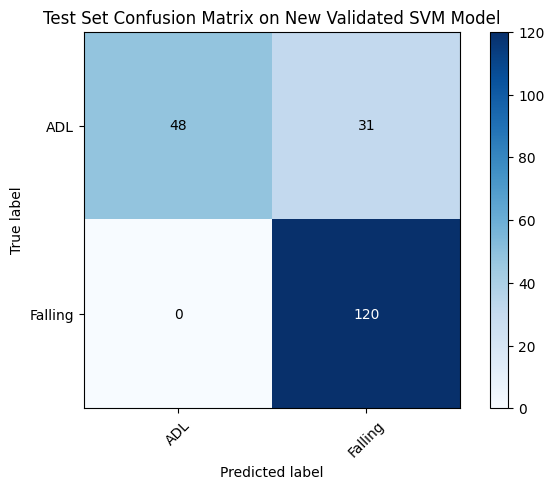

In [28]:
plot_confusion_matrix(y_test, y_test_pred, label_names, title=title)

In [29]:
classification_report(y_test, y_test_pred, target_names=label_names, output_dict=True)

{'ADL': {'precision': 1.0,
  'recall': 0.6075949367088608,
  'f1-score': 0.7559055118110236,
  'support': 79.0},
 'Falling': {'precision': 0.7947019867549668,
  'recall': 1.0,
  'f1-score': 0.8856088560885609,
  'support': 120.0},
 'accuracy': 0.8442211055276382,
 'macro avg': {'precision': 0.8973509933774835,
  'recall': 0.8037974683544304,
  'f1-score': 0.8207571839497922,
  'support': 199.0},
 'weighted avg': {'precision': 0.8762022030683216,
  'recall': 0.8442211055276382,
  'f1-score': 0.8341185837371767,
  'support': 199.0}}